In [43]:
#Importing Libraries

In [4]:
import numpy as np # type: ignore
import pandas as pd
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
# from pandas_profiling import ProfileReport

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

c:\Users\shriy\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Change the directory to the file location
os.chdir(r'C:\Users\shriy\OneDrive\Pictures\Documents\Desktop\Project_AI_Stylist')
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)

# Read the CSV file

data = pd.read_csv('styles.csv', delimiter=",", on_bad_lines="skip")
data

Current Working Directory: c:\Users\shriy\OneDrive\Pictures\Documents\Desktop\Project_AI_Stylist


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [6]:
data.shape

(44424, 10)

In [7]:
data.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [8]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [9]:
data.tail()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume
44423,51623,Women,Accessories,Watches,Watches,Pink,Winter,2016.0,Casual,Fossil Women Pink Dial Chronograph Watch ES3050


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [11]:
# Check for Duplication
data.nunique()

id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64

In [12]:
# Missing Values Calculation
data.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [13]:
#Percentage calculation of Missing Values
(data.isnull().sum()/(len(data)))*100
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [14]:
# removing a row as it contains a year with NaN
data= data.dropna(subset=['year', 'productDisplayName'])
data.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             10
season                 20
year                    0
usage                 312
productDisplayName      0
dtype: int64

In [15]:
# checking for the unique values in base colour
data['baseColour'].unique()

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink',
       'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Coffee Brown',
       'Yellow', 'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta',
       'Lavender', 'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin',
       'Burgundy', 'Grey Melange', 'Rust', 'Rose', 'Lime Green', 'Mauve',
       'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude',
       'Mushroom Brown', nan, 'Fluorescent Green'], dtype=object)

In [16]:
# checking for the unique values in season
data['season'].unique()

array(['Fall', 'Summer', 'Winter', 'Spring', nan], dtype=object)

In [17]:
# checking for the unique values in usage  
data['usage'].unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [ ]:
# # Encoding categorical data
# encoders = {}
# for column in ['subCategory', 'articleType', 'baseColour']:
#     encoders[column] = LabelEncoder()
#     data[column] = encoders[column].fit_transform(data[column].astype(str))

# # print("Encoded DataFrame:")
# # print(data)

# # Create KNN imputer instance
# imputer = KNNImputer(n_neighbors=3)

# # Apply KNN imputation
# data_imputed = data.copy()
# data_imputed[['subCategory', 'articleType', 'baseColour']] = imputer.fit_transform(data[['subCategory', 'articleType', 'baseColour']])

# # Decoding categorical data
# for column in ['subCategory', 'articleType', 'baseColour']:
#     # Ensure values are integers and within the valid range of the encoder
#     data_imputed[column] = data_imputed[column].round().astype(int)
#     data_imputed[column] = encoders[column].inverse_transform(data_imputed[column])

# print("Imputed DataFrame:")
# data_imputed

In [18]:
data= data.dropna(subset=['baseColour', 'season', 'usage'])
data.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [19]:
!pip install sweetviz

In [20]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('EDA_Report.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated.


In [45]:
#Extract Filenames from Folder

In [2]:
Filenames = []
for file in os.listdir('images'):
    Filenames.append(os.path.join('images',file))
    

In [3]:
len(Filenames)

44441

In [48]:
#Importing ResNet50 Model and Cofiguration

In [4]:
# Load the ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

# Create a new Sequential model
model = tf.keras.models.Sequential([
    base_model,
    GlobalMaxPool2D()
])

# Print the summary of the base_model to check the output shape
print("Base model summary:")
base_model.summary()

# Print the summary of the new model to ensure everything is correct
print("\nFinal model summary:")
model.summary()

Base model summary:


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)


Final model summary:


ValueError: Undefined shapes are not supported.

In [50]:
#Extracting Fetaures from Image

In [5]:
def image_feature_extraction(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)

    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)

    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    
    return norm_result

In [6]:
image_feature_extraction(Filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.        , 0.01761626, 0.001716  , ..., 0.01247231, 0.02726394,
       0.06899249], dtype=float32)

In [8]:
image_features = []

for file in Filenames[0:1000]:
    image_features.append(image_feature_extraction(file, model))
    
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.01761626, 0.001716  , ..., 0.01247231, 0.02726394,
        0.06899249], dtype=float32),
 array([0.        , 0.03648944, 0.        , ..., 0.0099793 , 0.02375531,
        0.04649903], dtype=float32),
 array([0.        , 0.03507704, 0.00732284, ..., 0.00283516, 0.        ,
        0.05435888], dtype=float32),
 array([0.00232171, 0.05030547, 0.00747744, ..., 0.00346683, 0.03391019,
        0.04565724], dtype=float32),
 array([0.00306835, 0.06240455, 0.        , ..., 0.00170627, 0.02032891,
        0.05833261], dtype=float32),
 array([0.        , 0.10469197, 0.00198068, ..., 0.        , 0.03033037,
        0.02712944], dtype=float32),
 array([0.        , 0.12438437, 0.01465612, ..., 0.00289709, 0.04055162,
        0.06534589], dtype=float32),
 array([0.        , 0.09169215, 0.01569912, ..., 0.        , 0.00503583,
        0.04560045], dtype=float32),
 array([0.        , 0.09545279, 0.01153319, ..., 0.0007301 , 0.04513261,
        0.07661063], dtype=float32),
 array([0.

In [9]:
Image_features = pkl.dump(image_features, open('Features_of_Images.pkl','wb'))

In [10]:
Filenames = pkl.dump(Filenames, open('filenames.pkl','wb'))

In [11]:
Image_features = pkl.load(open('Features_of_Images.pkl','rb'))

In [12]:
Filenames = pkl.load(open('filenames.pkl','rb'))

In [13]:
np.array(Image_features).shape

(1000, 2048)

In [96]:
#Finidng Simialar Images

In [14]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [15]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [16]:
input_image = image_feature_extraction(Filenames[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [17]:
distance,indices = neighbors.kneighbors([input_image])

In [21]:
indices[0]

array([    0,   997, 24435, 10899, 16037, 42338], dtype=int64)

In [18]:
from IPython.display import Image

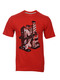

In [23]:
Image(Filenames[9])

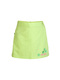

In [24]:
Image(Filenames[indices[0][1]])

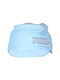

In [26]:
Image(Filenames[indices[0][2]])

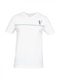

In [28]:
Image(Filenames[indices[0][3]])

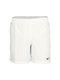

In [29]:
Image(Filenames[indices[0][4]])

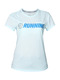

In [30]:
Image(Filenames[indices[0][5]])